Описание полей:<br><br>
- **DATE_OF_EVENT** - день клика, заплатить он мог мозже, но все равно тригер реги упадет сюда<br>
- **EVENT_ID** - уникальный ID клика, каждый пользователь может сделать неограниченное кол-во кликов<br>
- **USER_ID** - уникальный ID пользователя, каждый пользователь может сделать неограниченное кол-во кликов<br>
- **WAY_ID** - канал\сплит<br>
- **CAMPAIGN_ID** - группа баннеров, кампания, внутренний идентификатор<br>
- **PLACEMENT_ID** - баннер, на который кликнул пользователь.<br>
- **INT_CAMPAIGN_ID** - ID кампании<br>
- **MEDIUM_ID** - промежуточный баннер с вопросами (типа какой цвет волос нарвится, в каком городе живете, и тд.). Его могут не пройти, тогда будет отвал.<br>
- **PRODUCT_ID** - заход на регистрационную форму ID продукта. Тут может заполнить форму и перейти в событию регистрации. Или уйти.<br>
- **REG_TRIG** - ивент регистрации, каждый пользователь может зарегистрироваться неограниченном кол-ве продуктов. Но только 1 раз на каждом.<br>
- **PMNT_TRIG** - тригер платежа связки "USER_ID"-"PRODUCT_ID"-"REG_TRIG". Т.е данный юзер заплатил на данном продукте после реги. Платеж без невозможен.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

### 1. Data overview (1st data set)

There are two provided data sets. Here is the quick look at the first one.

In [2]:
df1 = pd.read_csv("1.csv")
df1.head()

,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG
0,2017-05-05,a18841cf5c3208f4c3d7b139589bc897b1f29f45,ea62471c114233e16ef425975d13d51de9e8f20d,b,ex13m,15982135,g6932ish,20484,NaN,0,0
1,2017-05-05,a1893bd515bf06853f45a3d0d038e96e5210fd72,0afaf3ac1ec6f685582145038bfece98f29f8fee,a,ex13m,16056045,g1417bel,19227,NaN,0,0
2,2017-05-05,a1893f9ef3cdb2f62db472b0d51bfedf92e499e9,f7135b828d63cb008497f40496a9425d0edc752d,a,ex13p1p,16051115,g6746yar,19769,NaN,0,0
3,2017-05-05,a189ffe910621a892af40d0ec3a9394bbee69875,b37c9d8a3801885db63369e661c00e5ec6bdfffa,a,tru3wb,231834,g5529bel,20443,wntmRfb4b6dc7647e11e6bf1e984be1741384_b2463e76...,0,0
4,2017-05-05,a18a240c3691c73d2c9465157824b1ad3e05b4b2,28dc89f5ecc3e14b64e38caedb97ffb959bc9839,a,th3m,In4j9u2h.gi4,g6388kro,17589,NaN,0,0


The cell below repesents the overall information about the data set.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535884 entries, 0 to 6535883
Data columns (total 11 columns):
DATE_OF_EVENT      object
EVENT_ID           object
USER_ID            object
WAY_ID             object
CAMPAIGN_ID        object
PLACEMENT_ID       object
INT_CAMPAIGN_ID    object
MEDIUM_ID          object
PRODUCT_ID         object
REG_TRIG           int64
PMNT_TRIG          int64
dtypes: int64(2), object(9)
memory usage: 548.5+ MB


### 2. Check & Clean Duplicated Data

The next step is checking if there are duplicate values in the data set.

In [4]:
df1.nunique()

DATE_OF_EVENT            8
EVENT_ID           5791635
USER_ID            4386570
WAY_ID                   6
CAMPAIGN_ID             71
PLACEMENT_ID          3267
INT_CAMPAIGN_ID        475
MEDIUM_ID              334
PRODUCT_ID            1074
REG_TRIG                 2
PMNT_TRIG                2
dtype: int64

The Shape attribute will show the number of records and columns.

In [5]:
df1.shape

(6535884, 11)

According to the fields description, **'EVENT_ID'** should be a unique value representing each unique user activity. **'USER_ID'** may be repeated as each unique user may perform more than one click.

How many duplicates?

In [6]:
df1.duplicated().sum()

743799

Just to be safe I would like to see that duplicated rows are truly identical.

In [7]:
duplicated1 = df1.copy()
duplicated1["is_duplicated"] = duplicated1['EVENT_ID'].duplicated(keep = False)
duplicated1 = duplicated1.loc[duplicated1['is_duplicated'] == True]
duplicated1 = duplicated1.sort_values(by ='EVENT_ID' )
duplicated1.head(10)

,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG,is_duplicated
513,2017-05-05,000002719a5b3ad89c588626bfe157bed8330830,497a196e0ac6975ac78f9a00d7c94dc430a45051,a,tE4,Ing_4t_556,g2224pod,20443,ndRdb64e45efe9a11e689f9984be1741384_4d5947a22f...,0,0,True
5770137,2017-05-05,000002719a5b3ad89c588626bfe157bed8330830,497a196e0ac6975ac78f9a00d7c94dc430a45051,a,tE4,Ing_4t_556,g2224pod,20443,ndRdb64e45efe9a11e689f9984be1741384_4d5947a22f...,0,0,True
3289548,2017-05-05,00001d36c1ab70802418dc4cd166a3766043e4e8,cc2b80426e9dcba4bbe0ada15ca8de8b910130fb,a,78dnm3bm,97104,g7414iva,19274,NaN,0,0,True
3289547,2017-05-05,00001d36c1ab70802418dc4cd166a3766043e4e8,cc2b80426e9dcba4bbe0ada15ca8de8b910130fb,a,78dnm3bm,97104,g7414iva,19274,NaN,0,0,True
514,2017-05-05,000062e2b9bb66dced99430bd2f4944ba229e79d,aaac613bc643f96728151530a3927493fbd310e5,d,wh3um,Qt1,g7162bar,20746,NaN,0,0,True
5770138,2017-05-05,000062e2b9bb66dced99430bd2f4944ba229e79d,aaac613bc643f96728151530a3927493fbd310e5,d,wh3um,Qt1,g7162bar,20746,NaN,0,0,True
3077,2017-05-05,000087dbc2f56bedfae7f697234547ef91557742,747b1f2e5c3ea16cb183b4e5f4509d7cecea696e,c,wh3um,Qt1,g7162bar,20670,NaN,0,0,True
3779691,2017-05-05,000087dbc2f56bedfae7f697234547ef91557742,747b1f2e5c3ea16cb183b4e5f4509d7cecea696e,c,wh3um,Qt1,g7162bar,20670,NaN,0,0,True
515,2017-05-05,0000aa7a3c3e5f73dfdd12cc0f4466fd0128ca20,8da262db93756dd36d80f90f7c7895e335a6f78e,a,rep3m,4809244,g1907iva,19769,NaN,0,0,True
5770139,2017-05-05,0000aa7a3c3e5f73dfdd12cc0f4466fd0128ca20,8da262db93756dd36d80f90f7c7895e335a6f78e,a,rep3m,4809244,g1907iva,19769,NaN,0,0,True


Dropping duplicated rows

In [8]:
df1.drop_duplicates(subset ="EVENT_ID", keep = 'first', inplace = True)
df1.shape

(5791635, 11)

Number of duplicated rows

In [9]:
df1.duplicated().sum()

0

### 3. Data overview (2nd data set)

In [10]:
df2 = pd.read_csv("2.csv")
df2.head()

,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG
0,2017-05-09,b93bd4e6a8aed200b84fb79c8ecf8a90d9449570,07e7283dc09c5808781780aa91168a429ddc8725,c,wh3um,Qt1,g7162bar,20429,NaN,0,0
1,2017-05-09,b93c645329d984b1cfb31446c18fc622a00f7b3b,a00499d242a6b02d49bf8b5e62543d5fbbc5ace2,a,ex13p1p,16051115,g6746yar,19769,NaN,0,0
2,2017-05-09,b93cb5f70f072ef7ac71611e601b55cfbb2dca19,44b7c7f1a29e01fcb79f1d60f1d0791722c5ad7e,a,tE4,Ing_4t_617,g2224pod,19254,NaN,0,0
3,2017-05-09,b93d0b4a241fb7ab80fbcc8e225d17afd7e85d04,6711bd2b41fc2547a9ef4c9d84f9dc25f4e15425,c,wh3um,Qt1,g7162bar,20429,iwntR0c064563003011e789f9984be1741384_3ed0b1ea...,0,0
4,2017-05-09,b93d1d747255452f2abb41966aedb09c5d009432,33c58ae6a7765aa85f22542aeef07b552b53d0d0,c,wh3um,Qt1,g7162bar,20670,NaN,0,0


In [11]:
df2.shape

(5070036, 11)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070036 entries, 0 to 5070035
Data columns (total 11 columns):
DATE_OF_EVENT      object
EVENT_ID           object
USER_ID            object
WAY_ID             object
CAMPAIGN_ID        object
PLACEMENT_ID       object
INT_CAMPAIGN_ID    object
MEDIUM_ID          object
PRODUCT_ID         object
REG_TRIG           int64
PMNT_TRIG          int64
dtypes: int64(2), object(9)
memory usage: 425.5+ MB


### 4. Check & Clean Duplicated Data (2nd data set)

The next step is checking if there are duplicate values in the data set.

In [13]:
df2.nunique()

DATE_OF_EVENT            7
EVENT_ID           5070036
USER_ID            3861336
WAY_ID                   6
CAMPAIGN_ID             67
PLACEMENT_ID          4224
INT_CAMPAIGN_ID        509
MEDIUM_ID              355
PRODUCT_ID            1054
REG_TRIG                 2
PMNT_TRIG                2
dtype: int64

In [14]:
df2.duplicated().sum()

0

No duplicates.

In [15]:
print(df1.shape)
print(df2.shape)

(5791635, 11)
(5070036, 11)


In [16]:
df = df1.append(df2)
df.shape

(10861671, 11)

In [17]:
df.duplicated().sum()

0

### 5. Check Missing Data

The next step will be checking missing values.

In [18]:
df.isnull().sum()

DATE_OF_EVENT             0
EVENT_ID                  0
USER_ID                   0
WAY_ID                    0
CAMPAIGN_ID              20
PLACEMENT_ID            477
INT_CAMPAIGN_ID           0
MEDIUM_ID             17855
PRODUCT_ID         10030525
REG_TRIG                  0
PMNT_TRIG                 0
dtype: int64

The big number of missing values was detected in **'PRODUCT_ID'** column. **'CAMPAIGN_ID'**, **'PLACEMENT_ID'**, **'MEDIUM_ID'** also have missing values.

**'CAMPAIGN_ID'** has 20 missing values and can be explored first

In [19]:
df.nunique()

DATE_OF_EVENT            15
EVENT_ID           10861671
USER_ID             7914413
WAY_ID                    6
CAMPAIGN_ID              76
PLACEMENT_ID           5559
INT_CAMPAIGN_ID         607
MEDIUM_ID               391
PRODUCT_ID             1400
REG_TRIG                  2
PMNT_TRIG                 2
dtype: int64

Observe the Dataframe **'CAMPAIGN_ID'** missing values.

In [20]:
CAMPAIGN_ID_NAN = df[df['CAMPAIGN_ID'].isnull()]
CAMPAIGN_ID_NAN

,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG
538131,2017-05-05,e2379bafcf557f64722b7d43ef3bc4c3a9f27083,ffd1461bcec93a50fda1109b0c63cb90a669e113,a,NaN,NaN,g4199moc,19242,NaN,0,0
1329614,2017-05-12,f3b23073c56653b1949cb0612752d8b5f46bb79b,1383132e5443aa126c6eb6ceb2149c4cbba662aa,a,NaN,NaN,g7255shm,20737,bnR28f8d4adff5a11e689f9984be1741384_3c09509e33...,1,0
1347716,2017-05-12,06a04c72e97f6dbf4eb8ff14de4d0183a2d76f02,dcf223455876739ea9bc1d30661297e28f21cb03,a,NaN,NaN,g3692shm,20621,fatfR3588bd0995d711e69bf5984be1741384_3ed0b2c6...,1,0
1362581,2017-05-12,08bccc705657a19e1e43cf83b62828e045e23cdd,2b84b35b138f37f7d708711592be31710ebd1ff7,a,NaN,NaN,g3692shm,20621,fatfR3588bd0995d711e69bf5984be1741384_3ed0b2c6...,1,0
1625991,2017-05-12,1248ed0ccbdf50cf117c178d3f4430266e742c11,cf2301cf5dcfb6d22312e23aec8f7053ae513e1c,a,NaN,NaN,g7255shm,20737,bnRcd533c5cff5e11e689f9984be1741384_3c09509e33...,1,0
1644581,2017-05-12,29231acff7b0123df41fe1343341ce916b249793,113236a25dc32204ae5a14a86ed1c42abb0d1ca5,a,NaN,NaN,g3692shm,20621,fatfR3588bd0995d711e69bf5984be1741384_3ed0b2c6...,0,0
1833542,2017-05-12,40b57ea7e911ea4405773720ad01084430d0267f,3bf68c38a56ae7f07b03b16ecbe751458a5a2a03,a,NaN,NaN,g3692shm,20621,fatfR3588bd0995d711e69bf5984be1741384_3ed0b2c6...,1,0
1893936,2017-05-12,30cd5a5b2a391095ba2186d3b4b38025768668b7,662744afb217c7a9d45e81c0447cd1f9501ad3e0,a,NaN,NaN,g3715shm,19791,sebpR85b86230c68c11e69bf5984be1741384_096e2bd2...,1,0
2110119,2017-05-12,62b4065e8d72a719a80e0fe375699a71bfb407dc,0223b14b7c244c09df763fa5c191253f7d1412f8,a,NaN,NaN,g7255shm,20737,bnR28f8d4adff5a11e689f9984be1741384_3c09509e33...,0,0
2250103,2017-05-12,75be7030614629bbd0514ad50d29f59ff36096f9,0a184f0cd6783d2d1ad28fc8433d3385ac0025e1,a,NaN,NaN,g3715shm,19791,sebpR85b86230c68c11e69bf5984be1741384_096e2bd2...,0,0


We may fill missing values in **'CAMPAIGN_ID'** by exploring **'INT_CAMPAIGN_ID'**.

In [21]:
CAMPAIGN_ID_NAN['INT_CAMPAIGN_ID'].nunique()

4

There are 4 different unique values in **'INT_CAMPAIGN_ID'** column.

Let's analyze the data set where **'INT_CAMPAIGN_ID'** has a certain value (first).

In [22]:
g4199moc = df.loc[df['INT_CAMPAIGN_ID'] == 'g4199moc']
g4199moc.shape

(26622, 11)

#### 1. g4199moc

In [23]:
g4199moc.head(3)

,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG
155,2017-05-05,a212702765b1ec98f3aea79b1dca4d75c2f153c3,dbc8b3c712fa29a9c52f5c6d87f53b37db27e843,a,tE43wb,Ing_bl_4t_198,g4199moc,20363,NaN,0,0
507,2017-05-08,c77ad8d92c2e85c5dc8f76d80cdcfa8ba03f62f5,f6b07281e1443a62240d308320ade3e31376c215,a,tE43wb,Ing_bl_Qq_29,g4199moc,19693,NaN,0,0
525,2017-05-05,0002e5b05024da32af6619edc87a527a01148946,afcc0b351d9e0e448220f5b3ea749205dafcb406,a,tE43wb,Ing_bl_4t_251,g4199moc,20363,NaN,0,0


Now, I'd like to see, if **'CAMPAIGN_ID'** has only one unique value in this data set, so we can fill NaNs with specific values accordingly.

In [24]:
g4199moc['CAMPAIGN_ID'].nunique()

1

We already know for sure that we can fill NaNs in **'CAMPAIGN_ID'** with **'tE43wb'** when **'CAMPAIGN_ID'** = **'g4199moc'**.

#### 2. g7255shm

Let's analyze the 2nd of values **'CAMPAIGN_ID'** wich is **'g7255shm'**

In [25]:
g7255shm = df.loc[df['INT_CAMPAIGN_ID'] == 'g7255shm']
g7255shm.shape

(10219, 11)

In [26]:
g7255shm['CAMPAIGN_ID'].nunique()

1

In [27]:
g7255shm.head(2)

,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG
518,2017-05-05,000169327828fd1613b37c2e4378c856b53068b0,e4cba30fcd948f2fd246d3313cbca83ae48693e3,a,tj3m,14545yy,g7255shm,20737,NaN,0,0
522,2017-05-05,00021921c492d6fdda6942f9cacb443005ec3f9c,19f2374af08552531b5562c3aa5e685f1743b167,a,tj3m,14545yy,g7255shm,20756,NaN,0,0


Same as previous, with **'tj3m'** value.

#### 3. 'g3692shm'

In [28]:
g3692shm = df.loc[df['INT_CAMPAIGN_ID'] == 'g3692shm']
print(g3692shm['CAMPAIGN_ID'].nunique())
g3692shm.head(3)

1


,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG
76,2017-05-05,a1cce1679c259044eeef0c7b573cfcf05203b4aa,5ec7ef3d3124d17021a6aebd11345dc3162e61b9,b,tj3m,0003wnyj,g3692shm,20622,NaN,0,0
217,2017-05-05,a2503fc131a07feb6c019b1abe366841a81528b9,51372bbaabe1bdb2a875d977a54bd177e2bdf648,a,tj3m,0046Q8Ix,g3692shm,20622,NaN,0,0
674,2017-05-05,003298a2e2c8515a541952edc620003849a2cdde,570eb3fc5a407cb29d7dd1a5882f362afd67e840,a,tj3m,00uzIqh1,g3692shm,20621,fatfR3588bd0995d711e69bf5984be1741384_3ed0b2c6...,1,0


Same **'CAMPAIGN_ID	'** value as in the previous. It can be used for both **'INT_CAMPAIGN_ID'** types.

#### 4. g3715shm

In [29]:
g3715shm = df.loc[df['INT_CAMPAIGN_ID'] == 'g3715shm']
print(g3715shm['CAMPAIGN_ID'].nunique())
g3715shm.head(3)

1


,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG
432,2017-05-08,c764918558f2b9091db76bfd7f0944d0d0869b53,ee88bbb3cb55f347b14c872658e01801104a2270,a,tj3m,1012895781,g3715shm,19791,NaN,0,0
529,2017-05-05,000599e3ebbd7efd93980749533bd8424f5b3f6e,b1c2cf3673d3e29c56a6f215fa6ef66f15b4fc0d,a,tj3m,1012895781,g3715shm,19791,NaN,0,0
1913,2017-05-06,3b39476151958bad3850a84e55b35dba18ae4e12,9c7007010fa7a924f4d0875eece490e14ffca9e5,a,tj3m,pr_bl (10),g3715shm,19791,sebpR85b86230c68c11e69bf5984be1741384_096e2bd2...,0,0


The missing value is also **'tj3m'**

The next step will be assigning actual values to NaN in **'CAMPAIGN_ID'** column.

In [30]:
print(df.isnull().sum())
print("Shape: ", df.shape)

DATE_OF_EVENT             0
EVENT_ID                  0
USER_ID                   0
WAY_ID                    0
CAMPAIGN_ID              20
PLACEMENT_ID            477
INT_CAMPAIGN_ID           0
MEDIUM_ID             17855
PRODUCT_ID         10030525
REG_TRIG                  0
PMNT_TRIG                 0
dtype: int64
Shape:  (10861671, 11)


Assigning actual values for **'g4199moc'**.

In [31]:
df['CAMPAIGN_ID'] = np.where(((df['CAMPAIGN_ID'].isnull()) & (df['INT_CAMPAIGN_ID'] =="g4199moc")),\
                                   "tE43wb",df['CAMPAIGN_ID'])

Assigning actual values for other three.

In [32]:
df['CAMPAIGN_ID'] = np.where(((df['CAMPAIGN_ID'].isnull()) & (df['INT_CAMPAIGN_ID'] =="g3715shm")),\
                                   "tj3m",df['CAMPAIGN_ID'])
df['CAMPAIGN_ID'] = np.where(((df['CAMPAIGN_ID'].isnull()) & (df['INT_CAMPAIGN_ID'] =="g3692shm")),\
                                   "tj3m",df['CAMPAIGN_ID'])
df['CAMPAIGN_ID'] = np.where(((df['CAMPAIGN_ID'].isnull()) & (df['INT_CAMPAIGN_ID'] =="g7255shm")),\
                                   "tj3m",df['CAMPAIGN_ID'])

NaN values in **'CAMPAIGN_ID'** have been replaced. Let's doublecheck

In [33]:
print(df.isnull().sum())
print("Shape: ", df.shape)

DATE_OF_EVENT             0
EVENT_ID                  0
USER_ID                   0
WAY_ID                    0
CAMPAIGN_ID               0
PLACEMENT_ID            477
INT_CAMPAIGN_ID           0
MEDIUM_ID             17855
PRODUCT_ID         10030525
REG_TRIG                  0
PMNT_TRIG                 0
dtype: int64
Shape:  (10861671, 11)


Now let's explore **'PLACEMENT_ID'** column with 477 missing values.

How many unique values in **'PLACEMENT_ID'** column?

In [34]:
df['PLACEMENT_ID'].nunique()

5559

The majority of **'PLACEMENT_ID'** data is present. Explore the data set with missing data only.

In [35]:
PLACEMENT_ID_NAN = df[df['PLACEMENT_ID'].isnull()]
print(PLACEMENT_ID_NAN.shape)
PLACEMENT_ID_NAN.head()

(477, 11)


,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG
5115,2017-05-05,008ab9d51b70a113941551fc3fb47a4436bc9bcd,e9471bbc68952de6b8f1152ee45e1df61ca727fe,a,tj3t78b,NaN,g6353moc,19022,NaN,0,0
32241,2017-05-05,02eb17742469296061ba5e18677622413e892e6c,8a2bc7fc8971f323717fe5380c72deae8d361abb,a,dn3um,NaN,g5451bar_http,20745,flirtRa2514fbe6eb311e6bf1e984be1741384_c475663...,0,0
71105,2017-05-05,b8ec35b0774ecff88c4bfcd68f294b2d3ce33c27,64c7b7b0235f37099dcc0d72abd276ee1ac94c51,a,dn3um,NaN,g5451bar_http,19254,NaN,0,0
103565,2017-05-06,462f0c7c488d931caa1c9d0db22b242980f26195,e74dd386d1b9ad6825fb5634d4f8a780f92433a9,a,dn3um,NaN,g5451bar_http,20151,NaN,0,0
105183,2017-05-05,08be207b02c04f2bd55e38f86b3963d41e94f38a,6213860735b73a6363590ab1989a20c99578853d,a,tE4,NaN,g2224pod,20322,NaN,0,0


Number of unique values in data set

In [36]:
PLACEMENT_ID_NAN.nunique()

DATE_OF_EVENT       15
EVENT_ID           477
USER_ID            408
WAY_ID               6
CAMPAIGN_ID          5
PLACEMENT_ID         0
INT_CAMPAIGN_ID     14
MEDIUM_ID           29
PRODUCT_ID          29
REG_TRIG             2
PMNT_TRIG            2
dtype: int64

Other missing data

In [37]:
PLACEMENT_ID_NAN.isnull().sum()

DATE_OF_EVENT        0
EVENT_ID             0
USER_ID              0
WAY_ID               0
CAMPAIGN_ID          0
PLACEMENT_ID       477
INT_CAMPAIGN_ID      0
MEDIUM_ID            1
PRODUCT_ID         290
REG_TRIG             0
PMNT_TRIG            0
dtype: int64

**'PLACEMENT_ID'** is a banner that belongs to a banner group **'CAMPAIGN_ID'**.

There are 5559 different variations of **'PLACEMENT_ID'** and 76 **'CAMPAIGN_ID'**.

Using the features which do not have missing values, we can predict the NaNs with the help of a machine learning algorithm. Unfortunately, our **'PLACEMENT_ID'** missing value is expected to have a very high variance, so a machine learning algorithm would not be a good fit and very time consuming.

The best way would be to assign An Unique Category to these 477 missing records

In [38]:
df['PLACEMENT_ID'] = df['PLACEMENT_ID'].fillna(value='Banner')

In [39]:
df.isnull().sum()

DATE_OF_EVENT             0
EVENT_ID                  0
USER_ID                   0
WAY_ID                    0
CAMPAIGN_ID               0
PLACEMENT_ID              0
INT_CAMPAIGN_ID           0
MEDIUM_ID             17855
PRODUCT_ID         10030525
REG_TRIG                  0
PMNT_TRIG                 0
dtype: int64

**MEDIUM_ID** - промежуточный баннер с вопросами (типа какой цвет волос нарвится, в каком городе живете, и тд.). Его могут не пройти, тогда будет отвал.

How many unique values?

In [40]:
df['MEDIUM_ID'].nunique()

391

The majority of **'MEDIUM_ID'** data is present. Explore the data set with missing data only.

In [41]:
MEDIUM_ID_NAN = df[df['MEDIUM_ID'].isnull()]
print(MEDIUM_ID_NAN.shape)
MEDIUM_ID_NAN.head()

(17855, 11)


,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG
53956,2017-05-06,40a6889f9e950f8c2ebd9464c1c7dd761f4d4b1d,5f5254ef32d8584b22c5a451354db4b19f149933,f,etg3em,Im8il,g7426zoz,NaN,bnR768621a8f77511e689f9984be1741384_3c09509e33...,0,0
56788,2017-05-06,41bacb48a6c1d668777a875c9e95cf1c87f8b49c,d109ba4dd9fc5b1eeadf46afcac575a84ff7fdf0,f,etg3em,Im8il,g7426zoz,NaN,bnR77cc384c000811e789f9984be1741384_3c09509e33...,0,0
57759,2017-05-06,411f31468cac932e77234295a12ca02a345bbc84,9b34668deb16c3630b45b0c61278f703418f9b7c,f,etg3em,Im8il,g7426zoz,NaN,bnR77cc384c000811e789f9984be1741384_3c09509e33...,0,0
72332,2017-05-06,4329091ecc5b6999befafe7d93b96b4d296a5235,f2cb6f8724794b77658270d982096558cfece868,f,etg3em,Im8il,g7426zoz,NaN,bnR768621a8f77511e689f9984be1741384_3c09509e33...,0,0
81864,2017-05-06,408c19c7468453ac7ed3d21b85c1bf4464c32ab3,ac62dd9816632abfa05292a93f67b0a967f54acf,f,etg3em,Im8il,g7426zoz,NaN,bnR392c9e75603411e49ef5441ea14ed80c_3c09509e33...,0,0


Some other features values seems the same

In [42]:
MEDIUM_ID_NAN.nunique()

DATE_OF_EVENT         13
EVENT_ID           17855
USER_ID            16425
WAY_ID                 6
CAMPAIGN_ID           17
PLACEMENT_ID          66
INT_CAMPAIGN_ID       36
MEDIUM_ID              0
PRODUCT_ID            31
REG_TRIG               2
PMNT_TRIG              2
dtype: int64

No, it is just a coincidence.

Again, for now let's assign An Unique Category to this missing data

In [43]:
df['MEDIUM_ID'] = df['MEDIUM_ID'].fillna(value='Medium')
df.isnull().sum()

DATE_OF_EVENT             0
EVENT_ID                  0
USER_ID                   0
WAY_ID                    0
CAMPAIGN_ID               0
PLACEMENT_ID              0
INT_CAMPAIGN_ID           0
MEDIUM_ID                 0
PRODUCT_ID         10030525
REG_TRIG                  0
PMNT_TRIG                 0
dtype: int64

**'PRODUCT_ID'** has the biggest number of missing values (10030525)

How many unique values?

In [44]:
df['PRODUCT_ID'].nunique()

1400

It is better to analyze a data subset with **'PRODUCT_ID'** present data, since the majority of **'PRODUCT_ID'** data is missing.

In [45]:
PRODUCT_ID_NOT_NULL = df[df.PRODUCT_ID.notnull()]
print(PRODUCT_ID_NOT_NULL.shape)
PRODUCT_ID_NOT_NULL.head()

(831146, 11)


,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG
3,2017-05-05,a189ffe910621a892af40d0ec3a9394bbee69875,b37c9d8a3801885db63369e661c00e5ec6bdfffa,a,tru3wb,231834,g5529bel,20443,wntmRfb4b6dc7647e11e6bf1e984be1741384_b2463e76...,0,0
73,2017-05-05,a1caadf594fb2a03bc2057387859da6389a0c2d1,2f7aab2019f27ea1afab46d8adea02eac4efa9fd,a,tE4,Ing_4t_580,g6507pod,20322,lvhR9cab8803e24e11e689f9984be1741384_bb4ffe887...,0,0
93,2017-05-05,a1da4f4b9ed56d10a988bcd96ae45058da6ca967,0c392d61ed47f3b2ffe4ec89382ccf4e1a506e88,a,whell3bm,Qt4,g4346bar,19254,bnR77cc384c000811e789f9984be1741384_3c09509e33...,1,0
108,2017-05-05,a1e4ca8bcfba7f653dcc111ffa36685d6274e1a5,441f4424d298cc381167e2e34f709bbf7809fe98,a,tru3bm,201157,g3493bel,19846,ndR3d29adffea8d11e58a6f101f74370270_4d5947a22f...,1,0
122,2017-05-05,a1f29a0733bfdc628947d4b5010d8f61c9d20dc0,206a1b6bcd93c33766e9d8668a1f58203ee4e15e,a,tE4,Ing_4t_580,g6507pod,20322,lvhR9cab8803e24e11e689f9984be1741384_bb4ffe887...,0,0


In [46]:
PRODUCT_ID_NOT_NULL.nunique()

DATE_OF_EVENT          15
EVENT_ID           831146
USER_ID            698318
WAY_ID                  6
CAMPAIGN_ID            63
PLACEMENT_ID         4085
INT_CAMPAIGN_ID       377
MEDIUM_ID             315
PRODUCT_ID           1400
REG_TRIG                2
PMNT_TRIG               2
dtype: int64

In [47]:
PRODUCT_ID_NOT_NULL['REG_TRIG'].value_counts()

0    585015
1    246131
Name: REG_TRIG, dtype: int64

In [48]:
df['REG_TRIG'].value_counts()

0    10614499
1      247172
Name: REG_TRIG, dtype: int64

In [49]:
PRODUCT_ID_NULL = df[df.PRODUCT_ID.isnull()]
print(PRODUCT_ID_NULL.shape)
PRODUCT_ID_NULL.head()

(10030525, 11)


,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG
0,2017-05-05,a18841cf5c3208f4c3d7b139589bc897b1f29f45,ea62471c114233e16ef425975d13d51de9e8f20d,b,ex13m,15982135,g6932ish,20484,NaN,0,0
1,2017-05-05,a1893bd515bf06853f45a3d0d038e96e5210fd72,0afaf3ac1ec6f685582145038bfece98f29f8fee,a,ex13m,16056045,g1417bel,19227,NaN,0,0
2,2017-05-05,a1893f9ef3cdb2f62db472b0d51bfedf92e499e9,f7135b828d63cb008497f40496a9425d0edc752d,a,ex13p1p,16051115,g6746yar,19769,NaN,0,0
4,2017-05-05,a18a240c3691c73d2c9465157824b1ad3e05b4b2,28dc89f5ecc3e14b64e38caedb97ffb959bc9839,a,th3m,In4j9u2h.gi4,g6388kro,17589,NaN,0,0
5,2017-05-05,a18a386a0b12684e51c7810b100c40d8398a7a5d,1f7103d4ad835ef72176a126c18f02ce5b4663b6,a,ex13m,16056373,g0230bel,19782,NaN,0,0


In [50]:
PRODUCT_ID_NULL['REG_TRIG'].value_counts()

0    10029484
1        1041
Name: REG_TRIG, dtype: int64

In [51]:
PRODUCT_ID_NULL['MEDIUM_ID'].value_counts()

20246    572793
19022    446042
20705    434061
19769    423571
20630    419253
          ...  
20361         1
19601         1
19643         1
20064         1
18486         1
Name: MEDIUM_ID, Length: 391, dtype: int64

I will create a data set for **'PRODUCT_ID'** specific analysis. As for the rest, the values can be replaces as a boolean (True/False, 1/0)<br> For now I will assign An Unique Category to this missing data.

In [52]:
df['PRODUCT_ID'] = df['PRODUCT_ID'].fillna(value='Product')
df.isnull().sum()

DATE_OF_EVENT      0
EVENT_ID           0
USER_ID            0
WAY_ID             0
CAMPAIGN_ID        0
PLACEMENT_ID       0
INT_CAMPAIGN_ID    0
MEDIUM_ID          0
PRODUCT_ID         0
REG_TRIG           0
PMNT_TRIG          0
dtype: int64

### 6. Exploratory data analysis

In [53]:
df.head()

,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG
0,2017-05-05,a18841cf5c3208f4c3d7b139589bc897b1f29f45,ea62471c114233e16ef425975d13d51de9e8f20d,b,ex13m,15982135,g6932ish,20484,Product,0,0
1,2017-05-05,a1893bd515bf06853f45a3d0d038e96e5210fd72,0afaf3ac1ec6f685582145038bfece98f29f8fee,a,ex13m,16056045,g1417bel,19227,Product,0,0
2,2017-05-05,a1893f9ef3cdb2f62db472b0d51bfedf92e499e9,f7135b828d63cb008497f40496a9425d0edc752d,a,ex13p1p,16051115,g6746yar,19769,Product,0,0
3,2017-05-05,a189ffe910621a892af40d0ec3a9394bbee69875,b37c9d8a3801885db63369e661c00e5ec6bdfffa,a,tru3wb,231834,g5529bel,20443,wntmRfb4b6dc7647e11e6bf1e984be1741384_b2463e76...,0,0
4,2017-05-05,a18a240c3691c73d2c9465157824b1ad3e05b4b2,28dc89f5ecc3e14b64e38caedb97ffb959bc9839,a,th3m,In4j9u2h.gi4,g6388kro,17589,Product,0,0


Coverting **'DATE_OF_EVENT'** to timestamp data.

In [54]:
df['DATE_OF_EVENT'] = pd.to_datetime(df['DATE_OF_EVENT'])

In [55]:
df.dtypes

DATE_OF_EVENT      datetime64[ns]
EVENT_ID                   object
USER_ID                    object
WAY_ID                     object
CAMPAIGN_ID                object
PLACEMENT_ID               object
INT_CAMPAIGN_ID            object
MEDIUM_ID                  object
PRODUCT_ID                 object
REG_TRIG                    int64
PMNT_TRIG                   int64
dtype: object

Boolean values total number

In [56]:
print('REG_TRIG: ', df['REG_TRIG'].value_counts())
print('PMNT_TRIG: ', df['PMNT_TRIG'].value_counts())

REG_TRIG:  0    10614499
1      247172
Name: REG_TRIG, dtype: int64
PMNT_TRIG:  0    10855549
1        6122
Name: PMNT_TRIG, dtype: int64


### WAY_ID feature

**WAY_ID** - канал\сплит

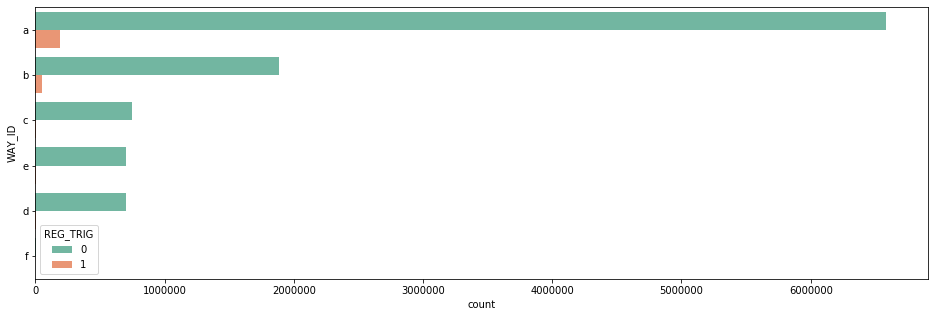

In [57]:
r = pl.figure(figsize=(16,5))
sns.countplot(y='WAY_ID', hue='REG_TRIG', data=df, palette='Set2',  order = df['WAY_ID'].value_counts().index)

Text(0.5, 1.0, 'WAY_ID no A&B')

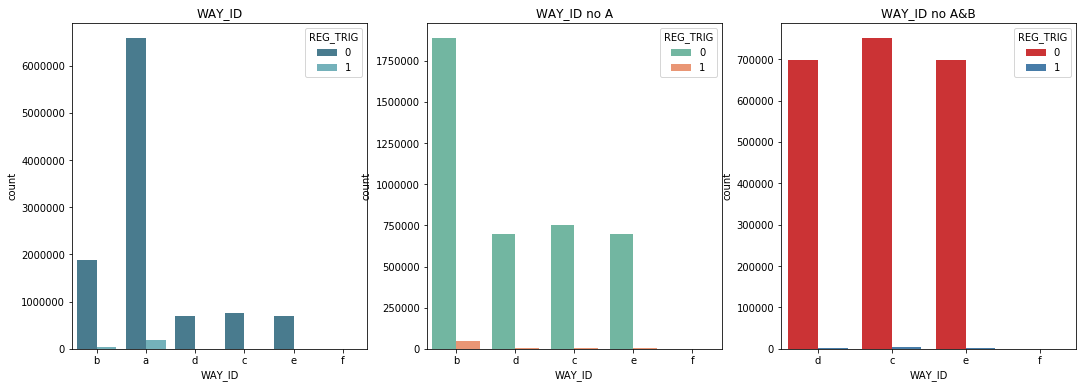

In [58]:
f, (ax1, ax2, ax3) = pl.subplots(ncols=3, figsize=(18,6))

ax = sns.countplot(x='WAY_ID', hue='REG_TRIG', data=df, palette='GnBu_d', ax=ax1)
ax1.set_title('WAY_ID')

ax = sns.countplot(x='WAY_ID', hue='REG_TRIG', data=df.loc[df['WAY_ID'] != 'a'], palette='Set2', ax=ax2)
ax2.set_title('WAY_ID no A')

ax = sns.countplot(x='WAY_ID', hue='REG_TRIG', data=df.loc[(df['WAY_ID'] != 'a') & (df['WAY_ID'] != 'b')], palette='Set1', ax=ax3)
ax3.set_title('WAY_ID no A&B')

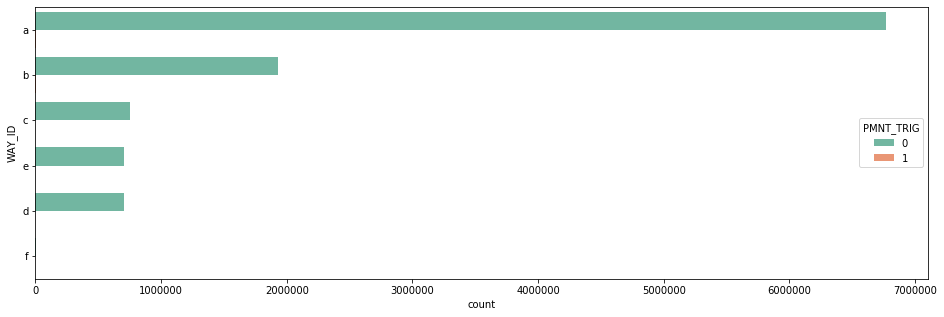

In [59]:
p = pl.figure(figsize=(16,5))
sns.countplot(y='WAY_ID', hue='PMNT_TRIG', data=df, palette='Set2',  order = df['WAY_ID'].value_counts().index)

Text(0.5, 1.0, 'WAY_ID no A&B')

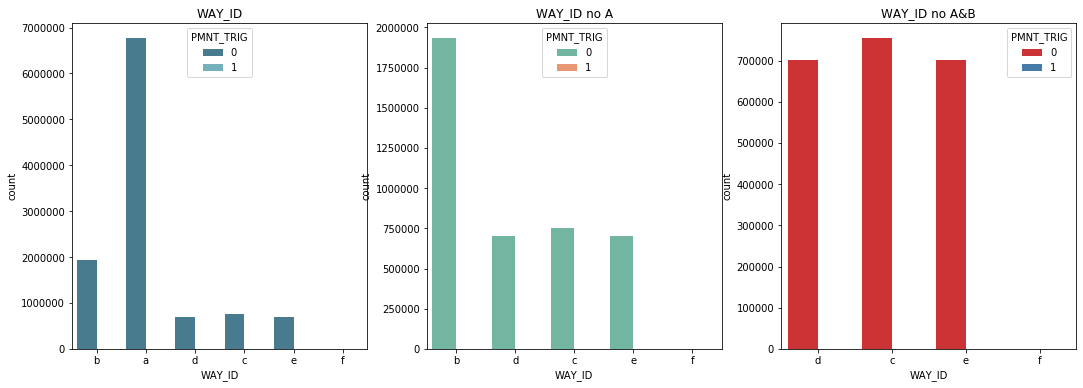

In [60]:
f, (ax1, ax2, ax3) = pl.subplots(ncols=3, figsize=(18,6))

ax = sns.countplot(x='WAY_ID', hue='PMNT_TRIG', data=df, palette='GnBu_d', ax=ax1)
ax1.set_title('WAY_ID')

ax = sns.countplot(x='WAY_ID', hue='PMNT_TRIG', data=df.loc[df['WAY_ID'] != 'a'], palette='Set2', ax=ax2)
ax2.set_title('WAY_ID no A')

ax = sns.countplot(x='WAY_ID', hue='PMNT_TRIG', data=df.loc[(df['WAY_ID'] != 'a') & (df['WAY_ID'] != 'b')], palette='Set1', ax=ax3)
ax3.set_title('WAY_ID no A&B')

In [61]:
REG = df.loc[df['REG_TRIG'] == 1]
REG.shape

(247172, 11)

In [62]:
REG['WAY_ID'].value_counts()

a    189870
b     47184
c      4120
d      2987
e      2972
f        39
Name: WAY_ID, dtype: int64

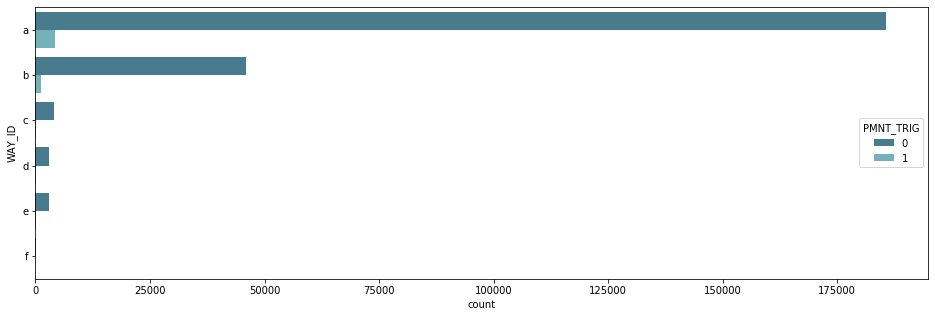

In [63]:
r = pl.figure(figsize=(16,5))
sns.countplot(y='WAY_ID', hue='PMNT_TRIG', data=REG, palette='GnBu_d')

Text(0.5, 1.0, 'WAY_ID no A&B')

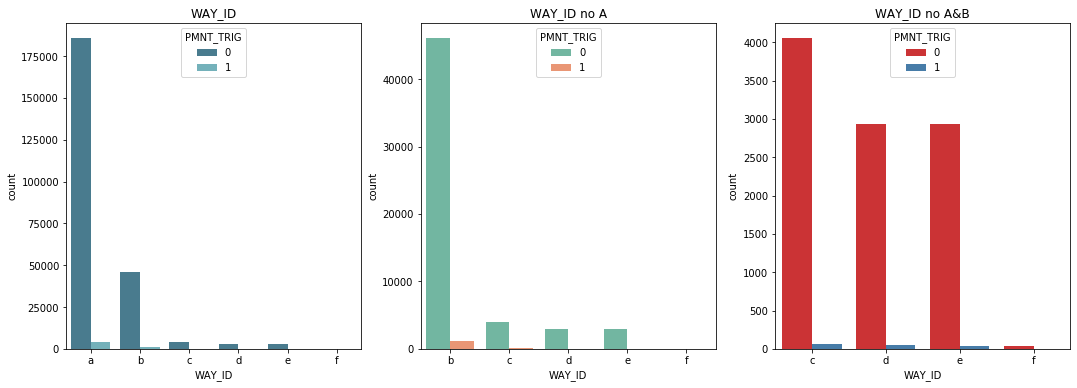

In [64]:
f, (ax1, ax2, ax3) = pl.subplots(ncols=3, figsize=(18,6))

ax = sns.countplot(x='WAY_ID', hue='PMNT_TRIG', data=REG, palette='GnBu_d', ax=ax1)
ax1.set_title('WAY_ID')

ax = sns.countplot(x='WAY_ID', hue='PMNT_TRIG', data=REG.loc[REG['WAY_ID'] != 'a'], palette='Set2', ax=ax2)
ax2.set_title('WAY_ID no A')

ax = sns.countplot(x='WAY_ID', hue='PMNT_TRIG', data=REG.loc[(REG['WAY_ID'] != 'a') & (REG['WAY_ID'] != 'b')], palette='Set1', ax=ax3)
ax3.set_title('WAY_ID no A&B')

In [65]:
PMNT = df.loc[df['PMNT_TRIG'] == 1]
PMNT.shape

(6122, 11)

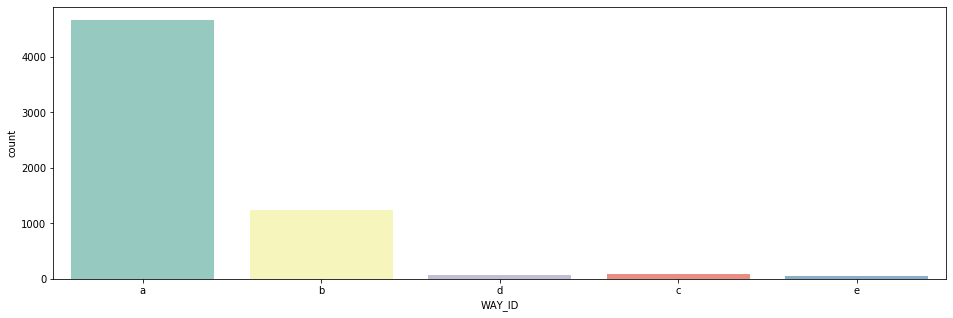

In [66]:
r = pl.figure(figsize=(16,5))
sns.countplot(x ='WAY_ID', data=PMNT, palette='Set3')

In [67]:
PMNT['WAY_ID'].value_counts()

a    4667
b    1239
c      90
d      74
e      52
Name: WAY_ID, dtype: int64

In [68]:
REG['WAY_ID'].value_counts()

a    189870
b     47184
c      4120
d      2987
e      2972
f        39
Name: WAY_ID, dtype: int64

In [69]:
df['WAY_ID'].value_counts()

a    6770949
b    1933736
c     754508
e     701175
d     700882
f        421
Name: WAY_ID, dtype: int64

### DATE_OF_EVENT feature

In [70]:
df['DAY'] = df['DATE_OF_EVENT'].dt.day

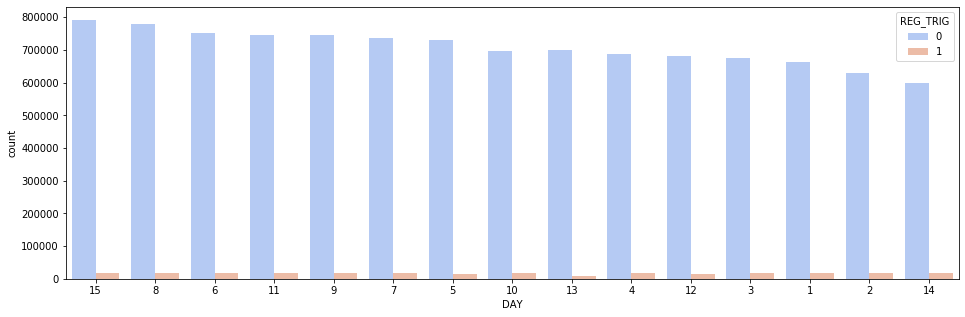

In [71]:
pl.figure(figsize=(16,5))
ax = sns.countplot(x ='DAY', hue='REG_TRIG', data=df, palette='coolwarm', order = df['DAY'].value_counts().index)

In [72]:
REGD = REG.copy()
REGD['DAY'] = REGD['DATE_OF_EVENT'].dt.day
REGD['DAY'].value_counts()

7     19177
8     18825
15    18265
6     18199
1     17629
11    17284
14    16970
9     16435
3     16341
2     16337
10    16310
4     16301
5     14858
12    14565
13     9676
Name: DAY, dtype: int64

In [73]:
df['DAY'].value_counts()

15    810146
8     798571
6     770349
11    763406
9     761571
7     755626
5     744249
10    713672
13    710053
4     704748
12    695981
3     691634
1     681716
2     644742
14    615207
Name: DAY, dtype: int64

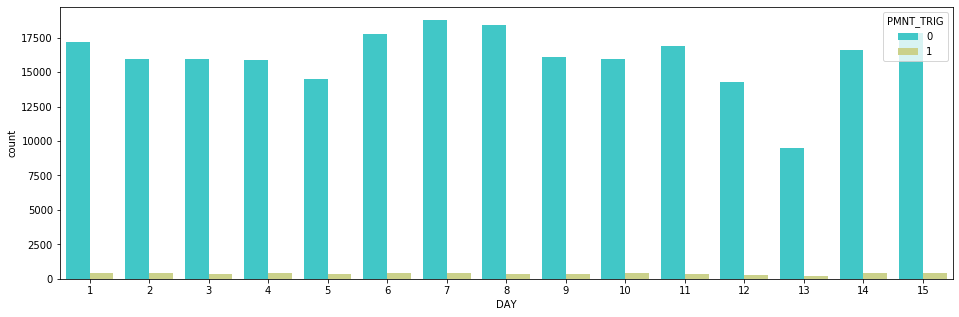

In [74]:
pl.figure(figsize=(16,5))
ax = sns.countplot(x ='DAY', hue='PMNT_TRIG', data=REGD, palette='rainbow')

In [75]:
PMNTD = PMNT.copy()
PMNTD['DAY'] = PMNTD['DATE_OF_EVENT'].dt.day
PMNTD['DAY'].value_counts()

1     470
2     462
6     457
15    450
10    436
4     434
8     433
7     432
14    420
3     414
11    412
5     394
9     361
12    324
13    223
Name: DAY, dtype: int64

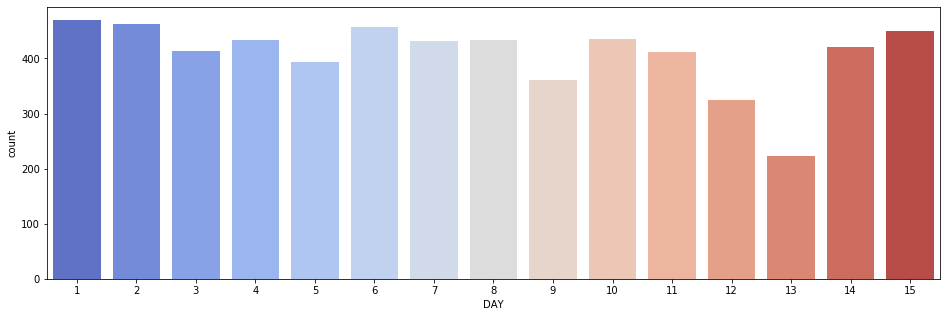

In [76]:
r = pl.figure(figsize=(16,5))
sns.countplot(x ='DAY', data=PMNTD, palette='coolwarm')

In [77]:
wd = pd.crosstab(df.WAY_ID,df.DAY)
wd

DAY,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
WAY_ID,,,,,,,,,,,,,,,
a,362963,360141,396986,423257,466025,457677,433792,455523,491054,445824,496130,451466,488586,423431,618094
b,129038,121298,123220,119529,120283,144731,155156,175660,138053,138739,132145,123290,118121,95403,99070
c,63277,54578,57305,54913,54288,57225,56828,56443,44270,42961,47505,46251,41622,38936,38106
d,63231,54451,57025,53490,51835,55248,54848,55409,44020,42986,43812,37589,30866,28711,27361
e,63201,54272,57094,53555,51816,55290,54802,55517,44173,43160,43814,37383,30858,28725,27515
f,6,2,4,4,2,178,200,19,1,2,0,2,0,1,0


(6.0, 0.0)

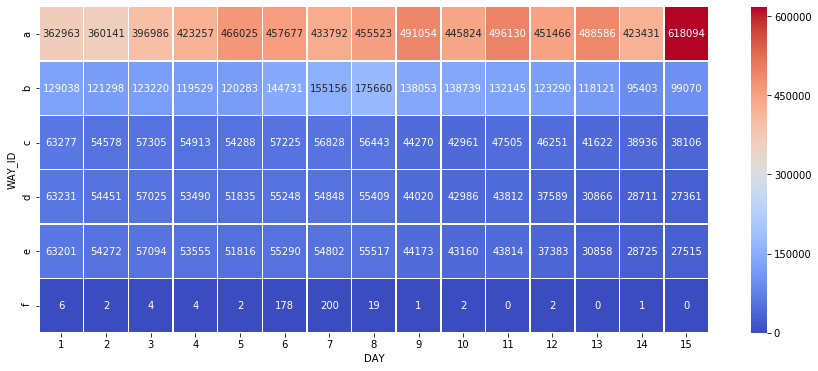

In [78]:
f, ax = pl.subplots(figsize=(15, 6))
sns.heatmap(wd, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [80]:
wdr = pd.crosstab(REGD.WAY_ID,REGD.DAY)
wdr

DAY,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
WAY_ID,,,,,,,,,,,,,,,
a,13316,12400,12385,12301,11102,13212,13648,13471,12296,12394,13262,11681,8244,14564,15594
b,3342,3107,3243,3222,2977,4066,4688,4580,3646,3417,3312,2298,1053,1946,2287
c,346,302,237,320,313,386,334,310,215,168,300,262,171,264,192
d,303,251,252,242,230,271,273,234,133,168,207,147,104,82,90
e,322,277,223,215,236,242,223,227,145,163,203,177,104,113,102
f,0,0,1,1,0,22,11,3,0,0,0,0,0,1,0


(6.0, 0.0)

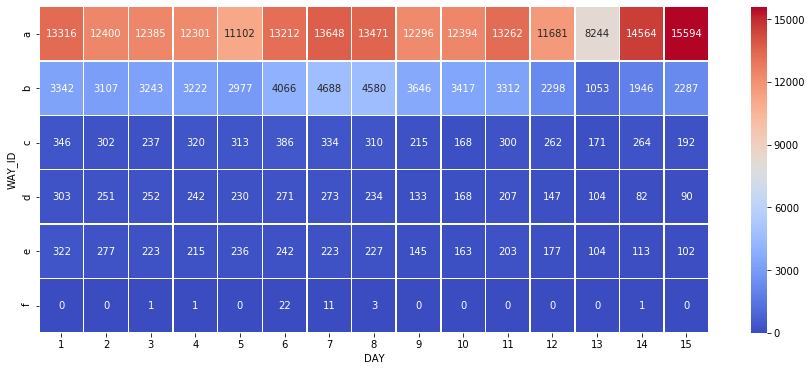

In [81]:
f, ax = pl.subplots(figsize=(15, 6))
sns.heatmap(wdr, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [82]:
wpd = pd.crosstab(PMNTD.WAY_ID,PMNTD.DAY)
wpd

DAY,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
WAY_ID,,,,,,,,,,,,,,,
a,369,341,308,330,294,324,314,288,269,326,326,258,188,350,382
b,80,104,88,82,87,114,98,124,86,98,78,51,29,62,58
c,7,8,8,7,6,6,8,9,2,6,3,10,1,3,6
d,7,8,5,5,2,8,9,6,3,4,4,3,5,3,2
e,7,1,5,10,5,5,3,6,1,2,1,2,0,2,2


(5.0, 0.0)

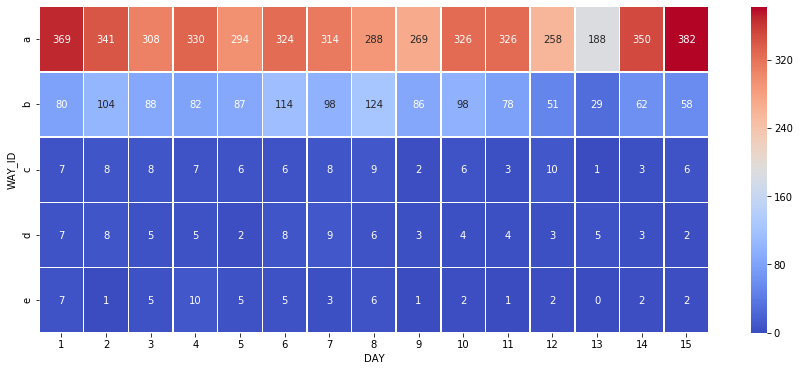

In [83]:
f, ax = pl.subplots(figsize=(15, 6))
sns.heatmap(wpd, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### CAMPAIGN_ID

In [84]:
df.head()

,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG,DAY
0,2017-05-05,a18841cf5c3208f4c3d7b139589bc897b1f29f45,ea62471c114233e16ef425975d13d51de9e8f20d,b,ex13m,15982135,g6932ish,20484,Product,0,0,5
1,2017-05-05,a1893bd515bf06853f45a3d0d038e96e5210fd72,0afaf3ac1ec6f685582145038bfece98f29f8fee,a,ex13m,16056045,g1417bel,19227,Product,0,0,5
2,2017-05-05,a1893f9ef3cdb2f62db472b0d51bfedf92e499e9,f7135b828d63cb008497f40496a9425d0edc752d,a,ex13p1p,16051115,g6746yar,19769,Product,0,0,5
3,2017-05-05,a189ffe910621a892af40d0ec3a9394bbee69875,b37c9d8a3801885db63369e661c00e5ec6bdfffa,a,tru3wb,231834,g5529bel,20443,wntmRfb4b6dc7647e11e6bf1e984be1741384_b2463e76...,0,0,5
4,2017-05-05,a18a240c3691c73d2c9465157824b1ad3e05b4b2,28dc89f5ecc3e14b64e38caedb97ffb959bc9839,a,th3m,In4j9u2h.gi4,g6388kro,17589,Product,0,0,5


In [85]:
df['CAMPAIGN_ID'].nunique()

76

In [86]:
df['CAMPAIGN_ID'].value_counts().nlargest(10)

wh3um       3484519
tE4         1745435
ex13m       1156423
ex13p1p      916732
tru3bm       830839
whell3bm     487584
tj3ub        411604
tru3wp       391027
tj3m         348831
tru3wb       182917
Name: CAMPAIGN_ID, dtype: int64

In [87]:
PMNT['CAMPAIGN_ID'].value_counts().nlargest(10)

tE4         2247
ex13m       1111
tj3m         602
tru3bm       301
wh3um        297
wh3bm        223
lvc3bm       192
th3m         188
78dnm3bm     174
tru3wb        87
Name: CAMPAIGN_ID, dtype: int64

Top 10 CAMPAIGN_ID by the number of events

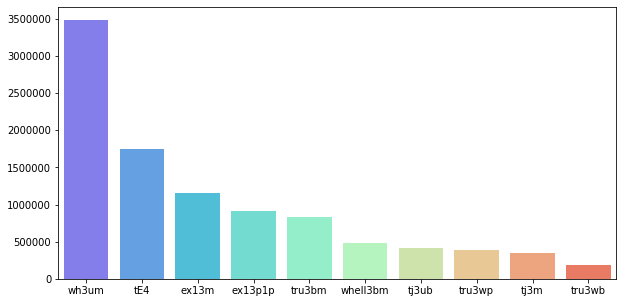

In [88]:
CAMPAIGN_ID_count  = df['CAMPAIGN_ID'].value_counts()
CAMPAIGN_ID_count = CAMPAIGN_ID_count[:10,]
pl.figure(figsize=(10,5))
sns.barplot(CAMPAIGN_ID_count.index, CAMPAIGN_ID_count.values, alpha=0.8, palette='rainbow')

Top 10 CAMPAIGN_ID by the number of registrations

In [89]:
REG['CAMPAIGN_ID'].value_counts().nlargest(10)

tE4         88611
ex13m       40136
tj3m        28030
wh3um       12722
tru3bm      12105
th3m        11373
78dnm3bm     6300
lvc3bm       6244
wh3bm        4615
tj3ub        4363
Name: CAMPAIGN_ID, dtype: int64

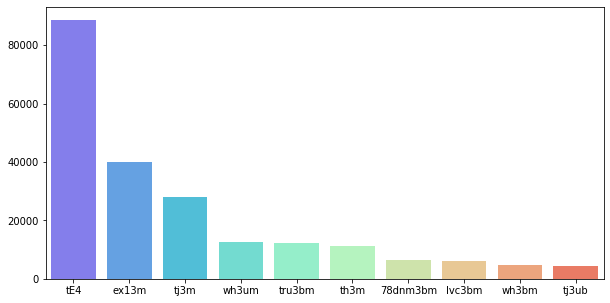

In [90]:
CAMPAIGN_ID_countR  = REG['CAMPAIGN_ID'].value_counts()
CAMPAIGN_ID_countR = CAMPAIGN_ID_countR[:10,]
pl.figure(figsize=(10,5))
sns.barplot(CAMPAIGN_ID_countR.index, CAMPAIGN_ID_countR.values, alpha=0.8, palette='rainbow')

Top 10 CAMPAIGN_ID by the number of payments

In [91]:
PMNT['CAMPAIGN_ID'].value_counts().nlargest(10)

tE4         2247
ex13m       1111
tj3m         602
tru3bm       301
wh3um        297
wh3bm        223
lvc3bm       192
th3m         188
78dnm3bm     174
tru3wb        87
Name: CAMPAIGN_ID, dtype: int64

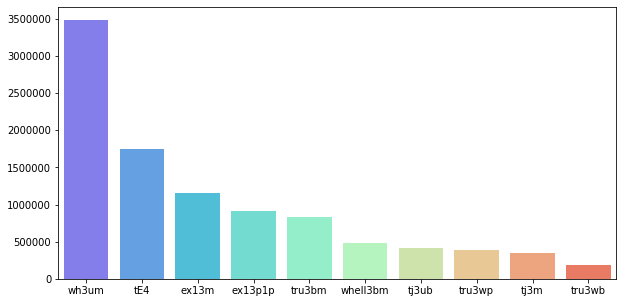

In [92]:
CAMPAIGN_ID_countP  = PMNT['CAMPAIGN_ID'].value_counts()
CAMPAIGN_ID_countP = CAMPAIGN_ID_count[:10,]
pl.figure(figsize=(10,5))
sns.barplot(CAMPAIGN_ID_countP.index, CAMPAIGN_ID_countP.values, alpha=0.8, palette='rainbow')

Text(0.5, 1.0, 'Events')

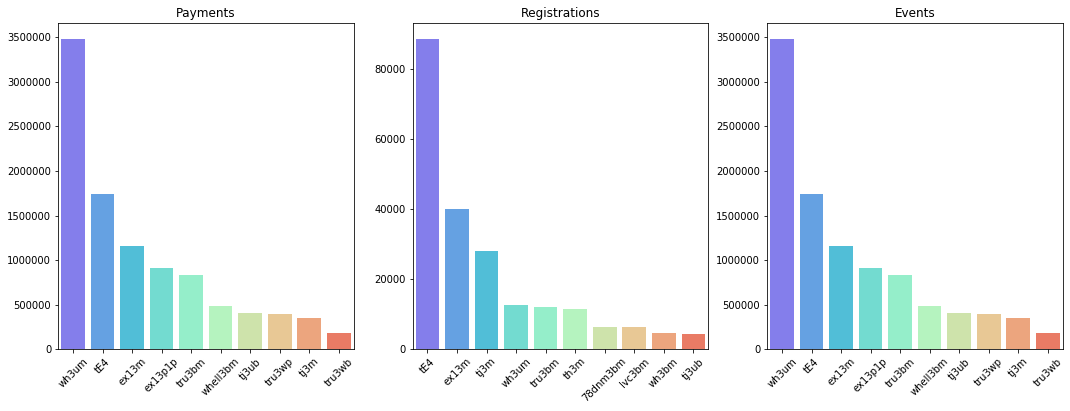

In [93]:
f, (ax1, ax2, ax3) = pl.subplots(ncols=3, figsize=(18,6))

sns.barplot(CAMPAIGN_ID_countP.index, CAMPAIGN_ID_countP.values, alpha=0.8, palette='rainbow', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Payments')

sns.barplot(CAMPAIGN_ID_countR.index, CAMPAIGN_ID_countR.values, alpha=0.8, palette='rainbow', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_title('Registrations')

sns.barplot(CAMPAIGN_ID_count.index, CAMPAIGN_ID_count.values, alpha=0.8, palette='rainbow', ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_title('Events')

### PLACEMENT_ID

In [94]:
df.head()

,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG,DAY
0,2017-05-05,a18841cf5c3208f4c3d7b139589bc897b1f29f45,ea62471c114233e16ef425975d13d51de9e8f20d,b,ex13m,15982135,g6932ish,20484,Product,0,0,5
1,2017-05-05,a1893bd515bf06853f45a3d0d038e96e5210fd72,0afaf3ac1ec6f685582145038bfece98f29f8fee,a,ex13m,16056045,g1417bel,19227,Product,0,0,5
2,2017-05-05,a1893f9ef3cdb2f62db472b0d51bfedf92e499e9,f7135b828d63cb008497f40496a9425d0edc752d,a,ex13p1p,16051115,g6746yar,19769,Product,0,0,5
3,2017-05-05,a189ffe910621a892af40d0ec3a9394bbee69875,b37c9d8a3801885db63369e661c00e5ec6bdfffa,a,tru3wb,231834,g5529bel,20443,wntmRfb4b6dc7647e11e6bf1e984be1741384_b2463e76...,0,0,5
4,2017-05-05,a18a240c3691c73d2c9465157824b1ad3e05b4b2,28dc89f5ecc3e14b64e38caedb97ffb959bc9839,a,th3m,In4j9u2h.gi4,g6388kro,17589,Product,0,0,5


In [95]:
df['PLACEMENT_ID'].nunique()

5560

Text(0.5, 1.0, 'Payments')

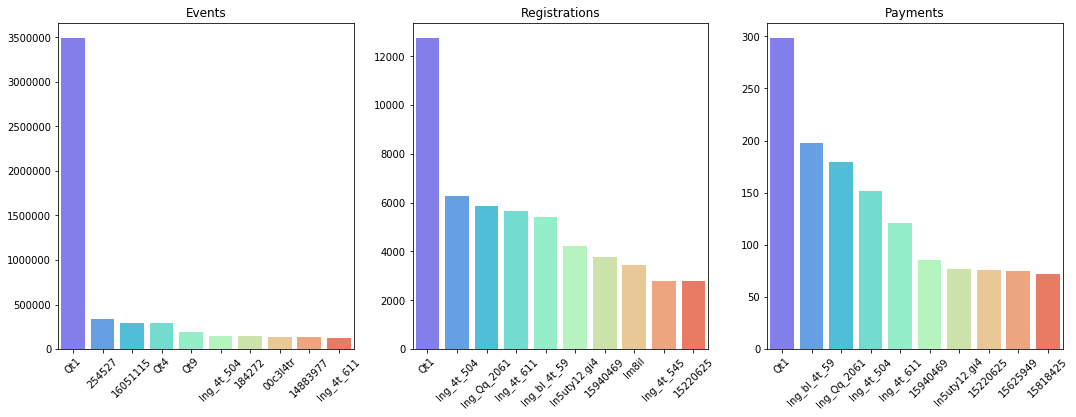

In [96]:
PLACEMENT_ID_count  = df['PLACEMENT_ID'].value_counts()
PLACEMENT_ID_count = PLACEMENT_ID_count[:10,]

PLACEMENT_ID_countR  = REG['PLACEMENT_ID'].value_counts()
PLACEMENT_ID_countR = PLACEMENT_ID_countR[:10,]

PLACEMENT_ID_countP  = PMNT['PLACEMENT_ID'].value_counts()
PLACEMENT_ID_countP = PLACEMENT_ID_countP[:10,]

f, (ax1, ax2, ax3) = pl.subplots(ncols=3, figsize=(18,6))

sns.barplot(PLACEMENT_ID_count.index, PLACEMENT_ID_count.values, alpha=0.8, palette='rainbow', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Events')

sns.barplot(PLACEMENT_ID_countR.index, PLACEMENT_ID_countR.values, alpha=0.8, palette='rainbow', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_title('Registrations')

sns.barplot(PLACEMENT_ID_countP.index, PLACEMENT_ID_countP.values, alpha=0.8, palette='rainbow', ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_title('Payments')

In [97]:
df['PLACEMENT_ID'].value_counts().nlargest(5)

Qt1         3487411
254527       336478
16051115     296138
Qt4          295150
Qt9          192426
Name: PLACEMENT_ID, dtype: int64

In [98]:
REG['PLACEMENT_ID'].value_counts().nlargest(5)

Qt1             12735
Ing_4t_504       6275
Ing_Qq_2061      5868
Ing_4t_611       5672
Ing_bl_4t_59     5398
Name: PLACEMENT_ID, dtype: int64

In [99]:
PMNT['PLACEMENT_ID'].value_counts().nlargest(5)

Qt1             298
Ing_bl_4t_59    198
Ing_Qq_2061     179
Ing_4t_504      152
Ing_4t_611      121
Name: PLACEMENT_ID, dtype: int64

### MEDIUM_ID

In [100]:
df['MEDIUM_ID'].nunique()

392

Text(0.5, 1.0, 'Payments')

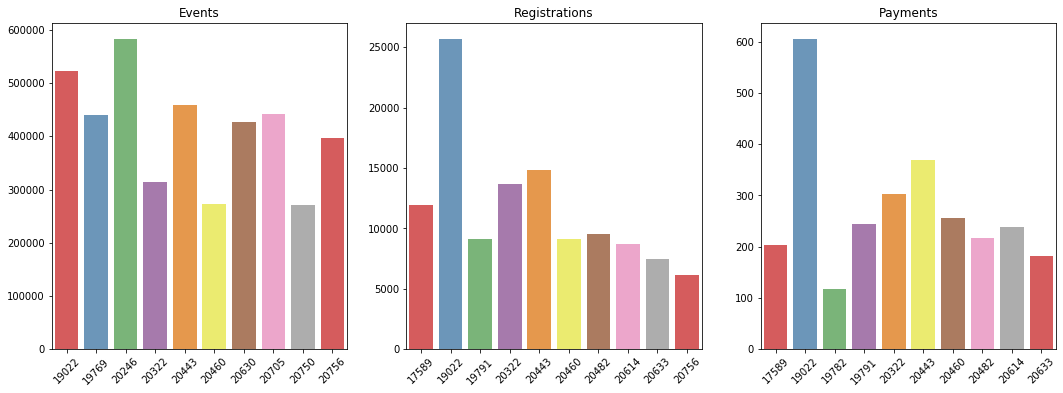

In [101]:
MEDIUM_ID_count  = df['MEDIUM_ID'].value_counts()
MEDIUM_ID_count = MEDIUM_ID_count[:10,]

MEDIUM_ID_countR  = REG['MEDIUM_ID'].value_counts()
MEDIUM_ID_countR = MEDIUM_ID_countR[:10,]

MEDIUM_ID_countP  = PMNT['MEDIUM_ID'].value_counts()
MEDIUM_ID_countP = MEDIUM_ID_countP[:10,]

f, (ax1, ax2, ax3) = pl.subplots(ncols=3, figsize=(18,6))

sns.barplot(MEDIUM_ID_count.index, MEDIUM_ID_count.values, alpha=0.8, palette='Set1', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Events')

sns.barplot(MEDIUM_ID_countR.index, MEDIUM_ID_countR.values, alpha=0.8, palette='Set1', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_title('Registrations')

sns.barplot(MEDIUM_ID_countP.index, MEDIUM_ID_countP.values, alpha=0.8, palette='Set1', ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_title('Payments')

In [102]:
df['MEDIUM_ID'].value_counts().nlargest(5)

20246    583674
19022    522698
20443    458913
20705    441602
19769    439983
Name: MEDIUM_ID, dtype: int64

In [103]:
REG['MEDIUM_ID'].value_counts().nlargest(5)

19022    25726
20443    14839
20322    13648
17589    11971
20482     9554
Name: MEDIUM_ID, dtype: int64

In [104]:
PMNT['MEDIUM_ID'].value_counts().nlargest(5)

19022    606
20443    369
20322    302
20460    256
19791    244
Name: MEDIUM_ID, dtype: int64

### PRODUCT_ID

In [105]:
df.head()

,DATE_OF_EVENT,EVENT_ID,USER_ID,WAY_ID,CAMPAIGN_ID,PLACEMENT_ID,INT_CAMPAIGN_ID,MEDIUM_ID,PRODUCT_ID,REG_TRIG,PMNT_TRIG,DAY
0,2017-05-05,a18841cf5c3208f4c3d7b139589bc897b1f29f45,ea62471c114233e16ef425975d13d51de9e8f20d,b,ex13m,15982135,g6932ish,20484,Product,0,0,5
1,2017-05-05,a1893bd515bf06853f45a3d0d038e96e5210fd72,0afaf3ac1ec6f685582145038bfece98f29f8fee,a,ex13m,16056045,g1417bel,19227,Product,0,0,5
2,2017-05-05,a1893f9ef3cdb2f62db472b0d51bfedf92e499e9,f7135b828d63cb008497f40496a9425d0edc752d,a,ex13p1p,16051115,g6746yar,19769,Product,0,0,5
3,2017-05-05,a189ffe910621a892af40d0ec3a9394bbee69875,b37c9d8a3801885db63369e661c00e5ec6bdfffa,a,tru3wb,231834,g5529bel,20443,wntmRfb4b6dc7647e11e6bf1e984be1741384_b2463e76...,0,0,5
4,2017-05-05,a18a240c3691c73d2c9465157824b1ad3e05b4b2,28dc89f5ecc3e14b64e38caedb97ffb959bc9839,a,th3m,In4j9u2h.gi4,g6388kro,17589,Product,0,0,5


In [106]:
PRODUCT = df.loc[df['PRODUCT_ID'] != 'Product']
PRODUCT.shape

(831146, 12)

In [107]:
PRODUCT['PRODUCT_ID'].nunique()

1400

In [108]:
PRODUCT_count  = PRODUCT['PRODUCT_ID'].value_counts()
PRODUCT_count = PRODUCT_count[:10,]

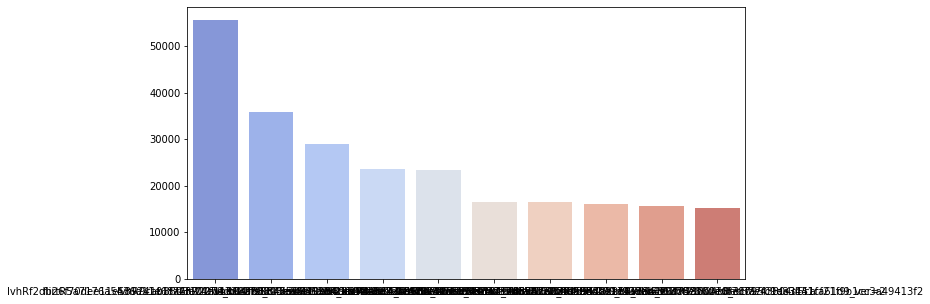

In [109]:
pl.figure(figsize=(10,5))
sns.barplot(PRODUCT_count.index, PRODUCT_count.values, alpha=0.8, palette='coolwarm')

In [110]:
PRODUCT['PRODUCT_ID'].value_counts().nlargest(10)

lvhRf2db26f70dee11e58974101f74370270_bb4ffe8873ce5b6a2627b9b19d32bb58            55623
flirtR5a7176a5436a11e68a6f101f74370270_c47566362bf21304b8ec57e43804d5ca_ver=2    35825
lvhR9cab8803e24e11e689f9984be1741384_bb4ffe8873ce5b6a2627b9b19d32bb58            29091
t2nR20becb19f83211e689f9984be1741384_f1878e86ded8e1fa7fc1de3151fa61d9            23703
lvhR9cab8803e24e11e689f9984be1741384_bb4ffe8873ce5b6a2627b9b19d32bb58_ver=2      23399
ndR10bb40acf9c111e689f9984be1741384_4d5947a22f09eec399d938bb0e6f7671             16472
ndR8ab141f90dbf11e58974101f74370270_4d5947a22f09eec399d938bb0e6f7671             16451
flirtR5a7176a5436a11e68a6f101f74370270_c47566362bf21304b8ec57e43804d5ca          16140
t2nR20becb19f83211e689f9984be1741384_f1878e86ded8e1fa7fc1de3151fa61d9_ver=2      15627
bnR5d617faa56d011e5a23b101f74370270_3c09509e33441cf21f9b1cc3a49413f2             15307
Name: PRODUCT_ID, dtype: int64